### Subplot() function
- Function returns a typle of length two: a figure object as well as the relevant axes object

[ 4.09482632 -1.07485605]


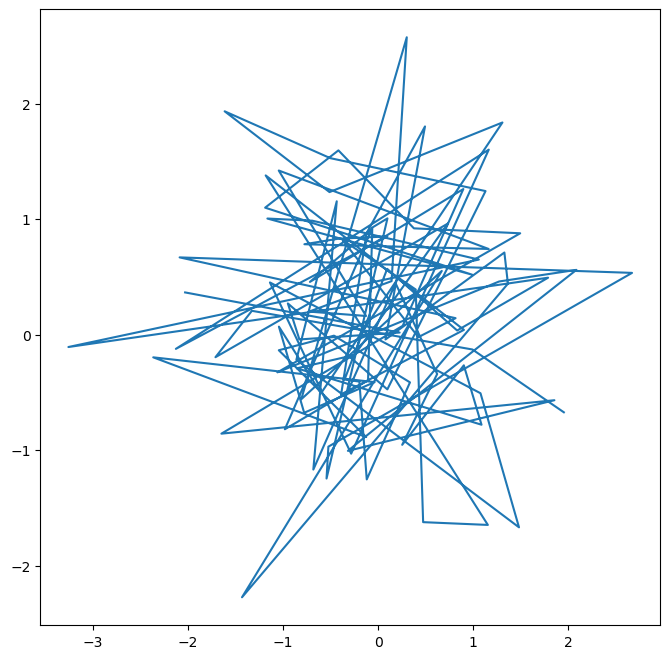

In [2]:
import numpy as np
from matplotlib.pyplot import subplots

rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=2))

# unpacking the tuple of length two into variables fig & ax
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)

# Will create a line plot by default
ax.plot(x, y);

# Equivalent, verbose code:
# output = subplots(figsize=(8, 8))
# fig = output[0]
# ax = output[1]

#### Creating a scatterplot
1. Adding an additional argument to **plot()** to make it into a scatterplot

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o');

2. Using **scatter()**

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o');

### Titling plot: *.set_xlabel(), .set_ylabel(), and .set_title()*

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

### Resizing plots and generating multiple plots
Having access to object *fig* means we can resdiplay the size

In [ ]:
fig.set_size_inches(12,3)
fig

In [ ]:
# 2x3 grid of plots with size 15 by 5
fig, axes = subplots(nrows=2,
ncols=3,
figsize=(15, 5))

#### Generating a grid of mix plots

In [ ]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

### Sophisticated Plots
**.contour()** method produces a *contour plot* to represent 3-D data like a topographical map.
Takes 3 arguments: 
- A vector of x values (the frst dimension),
- A vector of y values (the second dimension), and
- A matrix whose elements correspond to the z value (the third dimension) for each pair of (x,y) coordinates.

In [ ]:
# Creating plot object
fig, ax = subplots(figsize=(8, 8))

# np.linspace(a, b, n) -> returns a vector of n numbers from a->b
x = np.linspace(-np.pi, np.pi, 50)
y=x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))

# Creating our contour plot, but adding levels to icnrease resolution
ax.contour(x, y, f, levels=45);

#### Heatmaps using imshow()
Produces a color-coded plot whose colors dependo on the z-value

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.imshow(f);

## Sequences and Slice Notation
As seen above, we used **np.linspace()** to create sequence of numbers

In [ ]:
seq1 = np.linspace(0, 10, 11)
seq1

In [ ]:
# Creating a sequence of numbers spaced out by a step (default of 1 is used)
seq2 = np.arange(0, 10, 2)
seq2

## 2.3.6 Indexing Data
Creating a 2-D numpy array and indexing to a particular element **A[row, col]**

In [ ]:
A = np.array(np.arange(16)).reshape((4, 4))
print('Our 2-D array\n', A)
print('\nElement at [1,2]', A[1,2])

### Indexing rows, columns, submatrices
#### Multiple rows

In [ ]:
# Passing in a list to select rows
print(A[[1,3]])

# Selecting first and third columns, we pass ":" as the row argument to select all rows
print('\n', A[:,[0,2]])

#### Extracting Submatrices
The *convenience function* **np.ix_()** creates a *mesh* object

In [ ]:
idx = np.ix_([1,3],[0,2,3])
A[idx]

Another method is to using slicing

In [ ]:
# 1:4:2 captures the second and fourth items of a sequence, and 0:3:2 captures first and third items 
# The third element in a slice is the step size
A[1:4:2,0:3:2]

#### Boolean Indexing
As usual, even in numpy, boolean is a True or False value

In [ ]:
# Creating a vector of 0's with length equal to the first dimension of A. 
keep_rows = np.zeros(A.shape[0], bool)
print(keep_rows)

# Setting two of the elements = True
keep_rows[[1,3]] = True
print('\n', keep_rows)

# Showcasing that they are equal to integers (will print true)
print('\n', np.all(keep_rows == np.array([0,1,0,1])))

We can use our boolean vector to index through our array

In [ ]:
# This will only output the second and fourth rows as they are TRUE
A[keep_rows]

In [ ]:
# Create a boolean array of length equal to the number of columns in A
# Initially, all values are False — shape[1] returns the number of columns (2nd dimension at index 1)
keep_cols = np.zeros(A.shape[1], bool)

# Set the 0th, 2nd, and 3rd columns to True (i.e., we want to keep these columns)
keep_cols[[0, 2, 3]] = True

# Assume keep_rows is another boolean array (same length as number of rows in A)
# np.ix_ creates a tuple of index arrays suitable for fancy indexing
# It allows you to select specific rows and columns from a 2D array
idx_bool = np.ix_(keep_rows, keep_cols)

# Use the tuple of boolean arrays to index into A, extracting the selected rows and columns
A[idx_bool]

## 2.3.7 Loading Data
We can use data frames as data sets get too large for arrays. A data frame is essentially a sequence of arrays. Every column is its own array with values. 

#### Reading in a Data Set
As *Auto.csv* is already in our repo, we can import it using **read_csv()** command. 

In [ ]:
import pandas as pd
Auto = pd.read_csv('Auto.csv')
Auto

Selecting one of the columns, here we will sellect the column of **Auto** corresponding to *horsepower* which has the data type object. 

In [ ]:
Auto['horsepower']

All the values within the **horsepower** column were interpreted as strings (as we can tell by the dtype=object).
The question is, why? We can use **uniqe()** to find out. We can see there is a value of '?' which is causing all the data to be interpreted as a string. 

In [ ]:
np.unique(Auto['horsepower'])

We must replace the corrupted data with *not a number* values so it can be interpreted correctly. 

In [ ]:
Auto = pd.read_csv('Auto.csv', na_values=['?'])
Auto['horsepower'].sum()

# shape of a data frame gives (observations, variables)
print(Auto.shape)

#### Dealing with the missing data
Now that we replaced all '?' with NA values, we can remove these rows

In [ ]:
Auto_new = Auto.dropna()
Auto_new.shape

Using **.columns** to check variable names

In [ ]:
Auto = Auto_new # Rewriting previous value
Auto.columns

#### Accessing Rows and Cols of a DF
We access: DF[Rows, Cols]

In [ ]:
# Accessing the first 3 rows
Auto[:3]

In [ ]:
# Only the rows with years greater than 80
idx_80 = Auto['year'] > 80
Auto[idx_80]

When passing in a list of strings to the **[]** method, we will now have a DF corresponding to the columns.

In [ ]:
# Will only output the two given columns
Auto[['mpg', 'horsepower']]

In [ ]:
# As we do not have an index column, the rows are labeled 0-396, we can rename the rows 
Auto_re = Auto.set_index('name')
print(Auto_re)

# We can now see that the variable "name" is not is no longer a column
print('\n', Auto_re.columns)

#### The method **loc[]**

In [ ]:
# Now that the rows are index'd by name, we can use the loc[] method of Auto
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

#### The **iloc** method

In [ ]:
# Locating specific rows and/or columns
print('3rd and 4th row\n', Auto_re.iloc[[3, 4]]) # 3rd and 4th row
print('\n\n1st, 3rd, and 4th columns\n', Auto_re.iloc[:, [0,2,3]])
print('\n\n4th and 5th row of columns 1st, 3rd, and 4th\n', Auto_re.iloc[[3, 4], [0,2,3]])

### More on selecting Rows and Cols
Suppose we wanted to create a sub-df consisting of the *weight* and *origin* of the subset of cars with **year** greater than 80.
We can create a boolean array to index the rows than **loc[]** 

In [ ]:
# All the cars with a year > 80
idx_80 = Auto_re['year'] > 80
Auto_re.loc[idx_80, ['weight', 'origin']]

# Optimization 1: Lambda 
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']]

Another lambda

In [ ]:
# All cars built after 1980 that achieve greater than 30 mpg
Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
['weight', 'origin']
]

## For Loops
Standard iteration practice on data

In [ ]:
# Example looping over a list and computing their sum
total = 0
for value in [3,2,19]:
    total += value # increment notation
print('Total is: {0}'.format(total))

A more common task would be to compute the aveerage of a random variable that takes on possible values x, y, z with respective probabilities. We can use the **zip()** function for task like this 

In [ ]:
total = 0
for value, weight in zip([2,3,19],
                         [0.2,0.3,0.5]):
    total += weight * value
print('Weighted average is: {0}'.format(total))

### String Formatting
Many data cleaning tasks involve manipulating and programmatically producing strings. 
LINK: [String Formatting guide](docs.python.org/3/library/string.html)

## 2.3.9 Additional Graphical and Numerical Summaries
We can use serval plotting functions to display quantitative variables. We must plot the columns directly 

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

Alternatively we can use the **plot()** method to access the variables by name on our *Auto* data frame.

In [ ]:
ax = Auto.plot.scatter('horsepower', 'mpg');
ax.set_title('Horsepower vs. MPG')

We can instruct the data frame to plot a particular axes object. 

In [ ]:
fig, axes = subplots(ncols=3, figsize=(15, 5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[1]);

#### Changing a quantitative variable -> qualitative 
In this case, *cylinders* has a small amount of values and is treated quantatively initially using **pd.Series()**

In [ ]:
# Note: this function "series" comes from the panda framework. 
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
Auto.cylinders.dtype

We can now display it using the **boxplot()** method as it is a categorical variable.

NameError: name 'Auto' is not defined

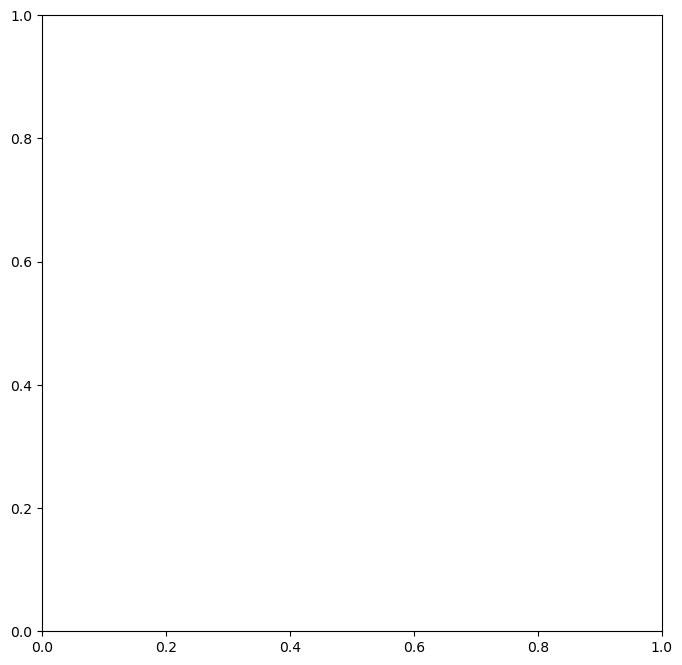

In [3]:
fig, ax = subplots(figsize=(8, 8))
Auto.boxplot('mpg', by='cylinders', ax=ax);

#### Histogram
We use **hist()** to plot a *histogram*.
In the following code we will also change the color of the bars and number of bins

In [ ]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', color='red', bins=12, ax=ax);

#### pd.plotting.scatter_matrix()
This function creates a *scatterplot matrix* to visualize pairwise relationships between columns in a data frame.

In [ ]:
# We could simply pass the entire dataframe, but this is scatterplots for a subset of variables
pd.plotting.scatter_matrix(Auto[['mpg',
                                'displacement',
                                'weight']]);

#### describe() 
Function produces a numericla summary of column(s)

In [ ]:
# Single column
Auto['cylinders'].describe()

# Multiple columns
Auto[['mpg', 'weight']].describe()